In [2]:
import os
import itertools
import glob
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import openpyxl
import matplotlib.ticker
import matplotlib.pyplot as plt


sns.set(font_scale=1.2, style='whitegrid', font='CMU Sans Serif')

# # drawio colors
# # 189,215,238
# # 255,230,153
# pal = sns.color_palette(['#BDD7EE', '#FFE699'])
# sns.set_palette("muted", 9)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (4.5,2)
mpl.rcParams['figure.dpi'] = 100

task_order = ["Remote Device Control", 'Scheduled Plans', "Comfort Home", "Energy Efficient Home"]

existing_dir_zh = 'zh-figures'
existing_dir_en = 'en-figures'
existing_dir_language = 'language-compare-figures'

In [3]:
def process_sheet(sheet_name):
    # 读取Excel文件中的指定工作表
    df = pd.read_excel('./result_llm4faas_4_sheet.xlsx', sheet_name=sheet_name)
    df = df.dropna(axis=1, how='all')
    print(df["Rate"].mean())
    return df

# 调用函数，传入工作表名称
# repeat_result_df = process_sheet('result_repeat')
# print(repeat_result_df)
# repeat_result_df.to_csv('repeat_result_df.csv', index=False)

semantic_repeat_df = process_sheet('semantic_repeat')
semantic_repeat_df.to_csv('semantic_repeat_df.csv', index=False)

0.8287666666666668


webf NOT subset; don't know how to subset; dropped


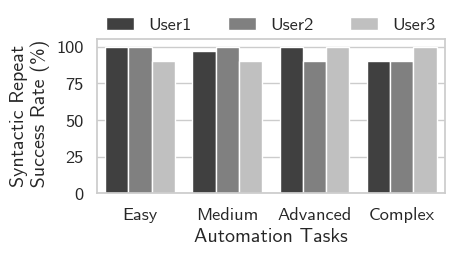

In [8]:
import matplotlib.patches as mpatches

# 读取数据并转换 Rate 列为百分比
df = pd.read_csv('repeat_result_df.csv')
# df = pd.read_csv('semantic_repeat_df.csv')
df['Rate'] = df['Rate'].astype(float) * 100

# 根据 'Original' 列的值为每个条形指定颜色
# df['Color'] = df['Original'].apply(lambda x: 'gray' if x == 'yes' else 'lightgray')

# 绘制基本的条形图
fig, ax = plt.subplots()

# 使用 'hue' 影响纹理，但是颜色通过 'Color' 来指定
g = sns.barplot(data=df, x='Task', y='Rate', hue='User', ax=ax, dodge=True, palette="gray")

# 定义 User 对应的纹理
# unique_users = df['User'].unique()
# hatch_mapping = {user: hatch for user, hatch in zip(unique_users, ['\\', '/', 'x'])}

# 为每个条形设置颜色和纹理
for (index, row), bar in zip(df.iterrows(), ax.patches):
    # 获取当前条形的数据
    original = row['Original']
    user = row['User']

    # 设置条形颜色
    # color = 'gray' if original == 'yes' else 'lightgray'
    # bar.set_facecolor(color)

    # 设置纹理
    # bar.set_hatch(hatch_mapping[user])

# 设置标题和标签
ax.set_xlabel('Automation Tasks')
ax.set_ylabel('Syntactic Repeat\n Success Rate (%)')
# ax.set_ylabel('Semantic Repeat\n Success Rate (%)')

# 创建自定义图例

# 添加 User 和纹理的图例
# user_handles = [
#     mpatches.Patch(facecolor='white', edgecolor='black', hatch=hatch_mapping[user], label=user)
#     for user in unique_users
# ]
#
# # 添加 Original 的图例
# original_legend = [
#     mpatches.Patch(facecolor='lightgray', label='Error: Yes'),
#     mpatches.Patch(facecolor='gray', label='Error: No'),
# ]

handles, labels = g.get_legend_handles_labels()

# 设置 legend 的顺序
plt.legend(
    handles=handles,
    # title='Legend',
    loc='upper center',
    bbox_to_anchor=(0.5,1.25),
    frameon=False,
    ncol = 3,
    # fontsize = 10,
    handlelength=1.5,          # Adjust length of legend handles
    # handletextpad=0.4,         # Space between handle and text
)

# 展示图形
plt.yticks([0, 25, 50, 75, 100])
plt.savefig("repeat_barplot_syntactic.pdf", bbox_inches = 'tight')

# plt.savefig("semantic_repeat_barplot.pdf", bbox_inches = 'tight')

plt.show()
